In [1]:
import pandas as pd

import glob, os
infolder='/Users/irffanalahi/Research/Research_update/for_backgroundcalculation/try1/RCresult/corefromserver/hyper.7'
out=infolder+"_avg.txt"

In [2]:
files = glob.glob(infolder+'/*.txt')
filesdf=[]
for fp in files:
    tmpdf=pd.read_csv(fp,sep="\t")
    tmpdf['filename']=os.path.basename(fp)
    filesdf.append(tmpdf)

In [3]:
df_combined = pd.concat(filesdf, axis=0)
df_combined.head()

,Mixture,EPCAM,FakeCell,filename
0,BS-Seq_07-no-spike_sorted_binnedstats.pkl,1016.75,0,BL22EPCAM_prom_all_matrix_NO_NA_withmincol.txt...
1,EM-Seq_07-no-spike_sorted_binnedstats.pkl,888.86,0,BL22EPCAM_prom_all_matrix_NO_NA_withmincol.txt...
0,BS-Seq_07-no-spike_sorted_binnedstats.pkl,995.19,0,BL22EPCAM_prom_all_matrix_NO_NA_withmincol.txt...
1,EM-Seq_07-no-spike_sorted_binnedstats.pkl,836.43,0,BL22EPCAM_prom_all_matrix_NO_NA_withmincol.txt...
0,BS-Seq_07-no-spike_sorted_binnedstats.pkl,999.60,0,BL22EPCAM_prom_all_matrix_NO_NA_withmincol.txt...


In [4]:
df_combined.to_csv(infolder+"_combined.txt",sep='\t',index=False)

In [5]:
df_combined.mean()

EPCAM       910.999833
FakeCell      0.000000
dtype: float64

In [6]:
df_combined.median()

EPCAM       910.42
FakeCell      0.00
dtype: float64

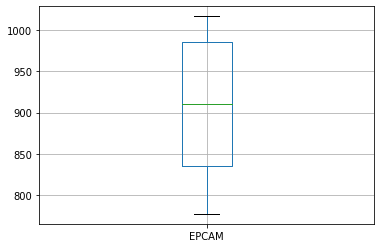

In [7]:
df_combined.boxplot(column='EPCAM')

In [8]:
set(df_combined['Mixture'].tolist())

{'BS-Seq_07-no-spike_sorted_binnedstats.pkl',
 'EM-Seq_07-no-spike_sorted_binnedstats.pkl'}

In [15]:
dfbs=df_combined[df_combined['Mixture']=='BS-Seq_07-no-spike_sorted_binnedstats.pkl']
dfbsmean=dfbs.mean()

In [22]:
dfbsmeandf=dfbsmean.to_frame(name='BSseq')

In [10]:
dfbs.to_csv(infolder+"_combined_bs.txt",sep='\t',index=False)

In [11]:
dfbs.median()

EPCAM       985.635
FakeCell      0.000
dtype: float64

In [20]:
dfem=df_combined[df_combined['Mixture']=='EM-Seq_07-no-spike_sorted_binnedstats.pkl']
dfemmean=dfem.mean()

In [23]:
dfemmeanDF=dfemmean.to_frame(name='EMseq')

In [25]:
meancombined=pd.concat([dfbsmeandf,dfemmeanDF],axis=1)
meancombined

,BSseq,EMseq
EPCAM,978.758667,843.241
FakeCell,0.000000,0.000
